https://docs.microsoft.com/en-us/azure/cognitive-services/face/quickstarts/python

Endpoint: https://westcentralus.api.cognitive.microsoft.com/face/v1.0

In [1]:
import requests
from IPython.display import HTML
import json

In [2]:
# Replace <Subscription Key> with your valid subscription key.
subscription_key = json.load(open("secret.json"))["ms_cognitive_face"][0]
assert subscription_key

In [3]:
# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the westcentralus region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

# Set image_url to the URL of an image that you want to analyze.
# image_url = 'https://how-old.net/Images/faces2/main007.jpg'

image_url = "http://files.mnw.art.pl/hackathon/img/0005.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,' +
    'emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

response = requests.post(
    face_api_url, params=params, headers=headers, json={"url": image_url})
faces = response.json()

In [4]:
faces

[{'faceAttributes': {'accessories': [],
   'age': 49.0,
   'blur': {'blurLevel': 'medium', 'value': 0.46},
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.999,
    'sadness': 0.001,
    'surprise': 0.0},
   'exposure': {'exposureLevel': 'goodExposure', 'value': 0.61},
   'facialHair': {'beard': 0.1, 'moustache': 0.1, 'sideburns': 0.1},
   'gender': 'male',
   'glasses': 'NoGlasses',
   'hair': {'bald': 0.86, 'hairColor': [], 'invisible': False},
   'headPose': {'pitch': 0.0, 'roll': -22.7, 'yaw': 16.3},
   'makeup': {'eyeMakeup': False, 'lipMakeup': False},
   'noise': {'noiseLevel': 'high', 'value': 0.74},
   'occlusion': {'eyeOccluded': False,
    'foreheadOccluded': False,
    'mouthOccluded': False},
   'smile': 0.0},
  'faceId': '726cf7b0-173e-4148-8b18-7d17c148d4d6',
  'faceRectangle': {'height': 312, 'left': 672, 'top': 707, 'width': 312}}]

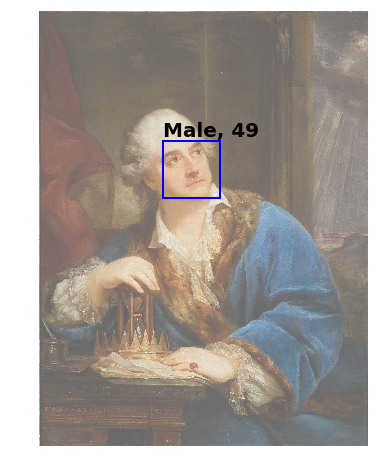

In [5]:
# Display the original image and overlay it with the face information.
# If you are using a Jupyter notebook, uncomment the following line.
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
from io import BytesIO

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.figure(figsize=(8, 8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(
        origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]),
             fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")